In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from helpers import *
from matplotlib import pyplot as plt
import numpy as np
from experiment_mnist import *
from experiment_constant import *
from experiment_random import *
from scipy.special import expit
import pandas as pd
import seaborn as sns

Using TensorFlow backend.


Testing equations:
1. $\mathbb{E}_\xi\Delta_L=p\sum\left(y(\vec{x}-x_i)-y(\vec{x})\right)+O(p^2)$
2. $\mathbb{E}_\xi\Delta_L=-p\nabla_x y_L(x)x+O(p^2x_i^2)$
3. $Var_\xi\Delta_L=p\sum\left(y(\vec{x}-x_i)-y(\vec{x})\right)^2+O(p^2)$
4. $Var_\xi\Delta_L=p(\nabla_x y_L(x))^2x^2+O(p^2x_i^2)$
5. $Var_\xi\Delta_L=pW^2_LK^2_{L-1}\odot W^2_{L-1}...W_2^2K_1^2\odot W_1^2x^2+O(p^2x_i^2w^2)$

Testing theorems:
1. $\mathbb{E}_{x}\mathbb{E}_{\xi}\Delta_L=O(p^2x_i^2)$
2. 	$\sum\limits_{i,j}\frac{\partial y_k}{\partial w_{ij}}w_{ij}=\sum\limits_{j}\frac{\partial y_k}{\partial x_j}x_j
    = -\frac{1}{p}(\mathbb{E}_\xi\Delta_L^k+O(p^2))$

In [2]:
# pfailure for the first layer
p = 1e-2

In [3]:
# run with random weights and multiple inputs
exp = RandomExperiment([50, 50, 50, 50, 50, 2], [p, 0, 0, 0], 1, activation = 'relu', std_weight = 3, mean_weight = 0.1)

In [4]:
# get input and calculate error
x = np.random.randn(50)

In [5]:
errors = exp.get_error(x, repetitions = 10000)
print(np.mean(errors, axis = 0), np.std(errors, axis = 0))

[-0.02773779 -0.0276744 ] [0.19873223 0.19829473]


Testing $\mathbb{E}_\xi\Delta_L=p\sum\left(y(\vec{x}-x_i)-y(\vec{x})\right)+O(p^2)$
and $\mathbb{E}_\xi\Delta_L=-p\nabla_x y_L(x)x+O(p^2x_i^2)$

In [6]:
print(exp.get_exact_error_v3_better(x))
print(exp.get_exact_error_v3(x))
print(exp.get_exact_error_v3_tf(x))

[[-0.02823501 -0.02817022]]
[[-0.0288614 ]
 [-0.02879526]]
[[-0.02886137 -0.02879524]]


Testing
3. $Var_\xi\Delta_L=p\sum\left(y(\vec{x}-x_i)-y(\vec{x})\right)^2+O(p^2)$
4. $Var_\xi\Delta_L=p(\nabla_x y_L(x))^2x^2+O(p^2x_i^2)$
5. $Var_\xi\Delta_L=pW^2_LK^2_{L-1}\odot W^2_{L-1}...W_2^2K_1^2\odot W_1^2x^2+O(p^2x_i^2w^2)$

In [7]:
print(exp.get_exact_std_error_v3_better(x))
print(exp.get_exact_std_error_v3_tf(x))

[[0.20126079 0.2008122 ]]
[[0.20520282 0.20474356]]


In [8]:
# not so good, not included
exp.get_exact_std_error_v3(x)

This function does not result in true variance: self.get_exact_std_error_v3


array([[0.00116016],
       [0.00112946]])

### Testing theorems
1. $\mathbb{E}_{x}\mathbb{E}_{\xi}\Delta_L=O(p^2x_i^2)$
2. 	$\sum\limits_{i,j}\frac{\partial y_k}{\partial w_{ij}}w_{ij}=\sum\limits_{j}\frac{\partial y_k}{\partial x_j}x_j
    = -\frac{1}{p}(\mathbb{E}_\xi\Delta_L^k+O(p^2))$

In [9]:
# pfailure for the first layer
p = 1e-2

784 200
200 200
200 200
200 10
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 200)               157000    
_________________________________________________________________
dense_24 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_25 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_26 (Dense)             (None, 10)                2010      
Total params: 239,410
Trainable params: 239,410
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 1s 10us/step - loss: 0.1810 - acc: 0.1666 - mean_squared_error: 0.1810 - val_loss: 0.1048 - val_acc: 0.3330 - val_mean_squared_err

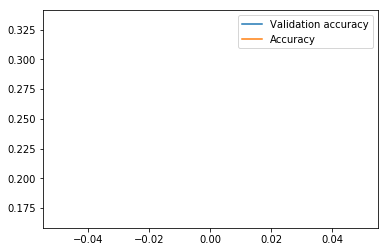

Creating network for 784-dimensional input and 10-dimensional output, with 3 hidden layers


In [21]:
exp = MNISTExperiment([200, 200, 200], [p, 0, 0], 1, epochs = 1, activation = 'relu', reg_type = 0, do_print = True)

In [22]:
sess.run(exp.model_no_dropout.layers[-1].output, feed_dict = {exp.model_no_dropout.layers[0].input.name: [np.random.randn(784)]})

FailedPreconditionError: Attempting to use uninitialized value dense_31/kernel
	 [[{{node dense_31/kernel/read}} = Identity[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:GPU:0"](dense_31/kernel)]]
	 [[{{node dense_34/BiasAdd/_477}} = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_39_dense_34/BiasAdd", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'dense_31/kernel/read', defined at:
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 499, in start
    self.io_loop.start()
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/asyncio/base_events.py", line 422, in run_forever
    self._run_once()
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/asyncio/base_events.py", line 1434, in _run_once
    handle._run()
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/tornado/ioloop.py", line 758, in _run_callback
    ret = callback()
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/tornado/gen.py", line 1233, in inner
    self.run()
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/tornado/gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 346, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 259, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 513, in execute_request
    user_expressions, allow_stdin,
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2817, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2843, in _run_cell
    return runner(coro)
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/IPython/core/async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3018, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3183, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3265, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-21-4b250e0fd9b5>", line 1, in <module>
    exp = MNISTExperiment([200, 200, 200], [p, 0, 0], 1, epochs = 1, activation = 'relu', reg_type = 0, do_print = True)
  File "/localhome/volodin/code/experiment_mnist.py", line 58, in __init__
    ConstantExperiment.__init__(self, N, P, KLips, W, B, activation, do_print, name = name)
  File "/localhome/volodin/code/experiment_constant.py", line 22, in __init__
    self.model_no_dropout = create_model([0] * len(self.P), self.W, self.B, self.K, activation)
  File "/localhome/volodin/code/helpers.py", line 183, in create_model
    bias_initializer = Constant(b)))
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/keras/engine/sequential.py", line 165, in add
    layer(x)
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/keras/engine/base_layer.py", line 431, in __call__
    self.build(unpack_singleton(input_shapes))
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/keras/layers/core.py", line 866, in build
    constraint=self.kernel_constraint)
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/keras/legacy/interfaces.py", line 91, in wrapper
    return func(*args, **kwargs)
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/keras/engine/base_layer.py", line 252, in add_weight
    constraint=constraint)
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py", line 402, in variable
    v = tf.Variable(value, dtype=tf.as_dtype(dtype), name=name)
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 145, in __call__
    return cls._variable_call(*args, **kwargs)
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 141, in _variable_call
    aggregation=aggregation)
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 120, in <lambda>
    previous_getter = lambda **kwargs: default_variable_creator(None, **kwargs)
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/tensorflow/python/ops/variable_scope.py", line 2441, in default_variable_creator
    expected_shape=expected_shape, import_scope=import_scope)
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 147, in __call__
    return super(VariableMetaclass, cls).__call__(*args, **kwargs)
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 1104, in __init__
    constraint=constraint)
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 1266, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py", line 81, in identity
    return gen_array_ops.identity(input, name=name)
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 3354, in identity
    "Identity", input=input, name=name)
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 488, in new_func
    return func(*args, **kwargs)
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3272, in create_op
    op_def=op_def)
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1768, in __init__
    self._traceback = tf_stack.extract_stack()

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value dense_31/kernel
	 [[{{node dense_31/kernel/read}} = Identity[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:GPU:0"](dense_31/kernel)]]
	 [[{{node dense_34/BiasAdd/_477}} = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_39_dense_34/BiasAdd", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


In [20]:
exp.get_exact_std_error_v3_tf(exp.x_train[:2])

FailedPreconditionError: Attempting to use uninitialized value dense_22/bias
	 [[{{node dense_22/bias/read}} = Identity[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:GPU:0"](dense_22/bias)]]

Caused by op 'dense_22/bias/read', defined at:
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 499, in start
    self.io_loop.start()
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/asyncio/base_events.py", line 422, in run_forever
    self._run_once()
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/asyncio/base_events.py", line 1434, in _run_once
    handle._run()
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/tornado/ioloop.py", line 758, in _run_callback
    ret = callback()
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/tornado/gen.py", line 1233, in inner
    self.run()
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/tornado/gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 346, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 259, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 513, in execute_request
    user_expressions, allow_stdin,
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2817, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2843, in _run_cell
    return runner(coro)
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/IPython/core/async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3018, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3183, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3265, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-10-4b250e0fd9b5>", line 1, in <module>
    exp = MNISTExperiment([200, 200, 200], [p, 0, 0], 1, epochs = 1, activation = 'relu', reg_type = 0, do_print = True)
  File "/localhome/volodin/code/experiment_mnist.py", line 57, in __init__
    # creating "crashing" and "normal" models
  File "/localhome/volodin/code/experiment_constant.py", line 22, in __init__
    self.model_no_dropout = create_model([0] * len(self.P), self.W, self.B, self.K, activation)
  File "/localhome/volodin/code/helpers.py", line 183, in create_model
    bias_initializer = Constant(b)))
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/keras/engine/sequential.py", line 181, in add
    output_tensor = layer(self.outputs[0])
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/keras/engine/base_layer.py", line 431, in __call__
    self.build(unpack_singleton(input_shapes))
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/keras/layers/core.py", line 872, in build
    constraint=self.bias_constraint)
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/keras/legacy/interfaces.py", line 91, in wrapper
    return func(*args, **kwargs)
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/keras/engine/base_layer.py", line 252, in add_weight
    constraint=constraint)
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py", line 402, in variable
    v = tf.Variable(value, dtype=tf.as_dtype(dtype), name=name)
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 145, in __call__
    return cls._variable_call(*args, **kwargs)
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 141, in _variable_call
    aggregation=aggregation)
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 120, in <lambda>
    previous_getter = lambda **kwargs: default_variable_creator(None, **kwargs)
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/tensorflow/python/ops/variable_scope.py", line 2441, in default_variable_creator
    expected_shape=expected_shape, import_scope=import_scope)
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 147, in __call__
    return super(VariableMetaclass, cls).__call__(*args, **kwargs)
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 1104, in __init__
    constraint=constraint)
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 1266, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py", line 81, in identity
    return gen_array_ops.identity(input, name=name)
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 3354, in identity
    "Identity", input=input, name=name)
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 488, in new_func
    return func(*args, **kwargs)
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3272, in create_op
    op_def=op_def)
  File "/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1768, in __init__
    self._traceback = tf_stack.extract_stack()

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value dense_22/bias
	 [[{{node dense_22/bias/read}} = Identity[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:GPU:0"](dense_22/bias)]]
